In [7]:
#Dependencies
!pip install gmplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from gmplot import gmplot
import gmaps
# Google developer API key
from config import gkey

# Access maps with unique API key
gmaps.configure(api_key=gkey)

distributed 1.21.8 requires msgpack, which is not installed.


In [8]:
# Name of the csv file
crime_csv_path = 'my_crime_data.csv'

In [9]:
# Import the data into a Pandas DataFrame
crime_df = pd.read_csv(crime_csv_path)
#crime_df.head()

crime_df["YEAR"] = crime_df["END_DATE"].str[0:4]

crime_df.to_csv("my_crime_data")


#crime_df["YEAR"]

In [10]:
# Delete extraneous column
crime_df.count()

Unnamed: 0              282611
NEIGHBORHOOD_CLUSTER    279042
CENSUS_TRACT            281769
offensegroup            282611
LONGITUDE               282611
END_DATE                271780
offense-text            282611
SHIFT                   282611
YBLOCK                  282611
DISTRICT                282449
WARD                    282599
YEAR                    271780
offensekey              282611
BID                      46291
sector                  282432
PSA                     282432
ucr-rank                282611
BLOCK_GROUP             281769
VOTING_PRECINCT         282551
XBLOCK                  282611
BLOCK                   282611
START_DATE              282603
CCN                     282611
OFFENSE                 282611
ANC                     282611
REPORT_DAT              282611
METHOD                  282611
location                282611
LATITUDE                282611
dtype: int64

In [11]:
# drop all rows with missing information
no_null_crime_df = crime_df.dropna(how='any')

In [12]:
#Verify dropped rows
no_null_crime_df.count()

Unnamed: 0              43496
NEIGHBORHOOD_CLUSTER    43496
CENSUS_TRACT            43496
offensegroup            43496
LONGITUDE               43496
END_DATE                43496
offense-text            43496
SHIFT                   43496
YBLOCK                  43496
DISTRICT                43496
WARD                    43496
YEAR                    43496
offensekey              43496
BID                     43496
sector                  43496
PSA                     43496
ucr-rank                43496
BLOCK_GROUP             43496
VOTING_PRECINCT         43496
XBLOCK                  43496
BLOCK                   43496
START_DATE              43496
CCN                     43496
OFFENSE                 43496
ANC                     43496
REPORT_DAT              43496
METHOD                  43496
location                43496
LATITUDE                43496
dtype: int64

In [13]:
# Verify the data types
no_null_crime_df.dtypes


Unnamed: 0                int64
NEIGHBORHOOD_CLUSTER     object
CENSUS_TRACT            float64
offensegroup             object
LONGITUDE               float64
END_DATE                 object
offense-text             object
SHIFT                    object
YBLOCK                  float64
DISTRICT                float64
WARD                    float64
YEAR                     object
offensekey               object
BID                      object
sector                   object
PSA                     float64
ucr-rank                  int64
BLOCK_GROUP              object
VOTING_PRECINCT          object
XBLOCK                  float64
BLOCK                    object
START_DATE               object
CCN                       int64
OFFENSE                  object
ANC                      object
REPORT_DAT               object
METHOD                   object
location                 object
LATITUDE                float64
dtype: object

In [14]:
# Check to see if there are any values with mispelled or similar values in "Offense Type"
no_null_crime_df["OFFENSE"].value_counts()

theft/other                   25727
theft f/auto                  10021
robbery                        2778
motor vehicle theft            1679
assault w/dangerous weapon     1527
burglary                       1465
sex abuse                       242
homicide                         47
arson                            10
Name: OFFENSE, dtype: int64

In [15]:
#Clean up Neighborhood Cluster and replace it with actual name areas
no_null_crime_df=no_null_crime_df.rename(index=str , columns={"NEIGHBORHOOD_CLUSTER":"NEIGHBORHOOD"})



In [16]:
# replace the clusters with actual names continued
no_null_crime_df['NEIGHBORHOOD']= no_null_crime_df['NEIGHBORHOOD'].replace(
    {'cluster 15':'Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone Terrace',
     'cluster 2':'Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View',
     'cluster 3':'Howard University, Le Droit Park, Cardozo/Shaw',
     'cluster 4':'Georgetown, Burleith/Hillandale',
     'cluster 5':'West End, Foggy Bottom, GWU',
     'cluster 6':'Dupont Circle, Connecticut Avenue/K Street',
     'cluster 1':'Kalorama Heights, Adams Morgan, Lanier Heights',
     'cluster 7':'Shaw, Logan Circle',
     'cluster 8': 'Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street',
     'cluster 9': 'Southwest Employment Area, Southwest/Waterfront, Fort McNair, Buzzard Point',
     'cluster 10': 'Hawthorne, Barnaby Woods, Chevy Chase',
     'cluster 11':'Friendship Heights, American University Park, Tenleytown',
     'cluster 12':'North Cleveland Park, Forest Hills, Van Ness',
     'cluster 13':'Spring Valley, Palisades, Wesley Heights, Foxhall Crescent, Foxhall Village, Georgetown Reservoir',
     'cluster 14':'Cathedral Heights, McLean Gardens, Glover Park',
     'cluster 16': 'Colonial Village, Shepherd Park, North Portal Estates',
     'cluster 17': 'Takoma, Brightwood, Manor Park',
     'cluster 18': 'Brightwood Park, Crestwood, Petworth',
     'cluster 19':'Lamond Riggs, Queens Chapel, Fort Totten, Pleasant Hill',
     'cluster 20': 'North Michigan Park, Michigan Park, University Heights',
     'cluster 21': 'Edgewood, Bloomingdale, Truxton Circle, Eckington',
     'cluster 22':'Brookland, Brentwood, Langdon',
     'cluster 23':'Ivy City, Arboretum, Trinidad, Carver Langston',
     'cluster 24':'Woodridge, Fort Lincoln, Gateway',
     'cluster 25': 'NoMa, Union Station, Stanton Park, Kingman Park',
     'cluster 26':'Capitol Hill, Lincoln Park',
     'cluster 27':'Near Southeast, Navy Yard',
     'cluster 28': 'Historic Anacostia',
     'cluster 29': 'Eastland Gardens, Kenilworth',
     'cluster 30': 'Mayfair, Hillbrook, Mahaning Heights',
     'cluster 31': 'Deanwood, Burrville, Grant Park, Lincoln Heights, Fairmont Heights',
     'cluster 32': 'River Terrace, Benning, Greenway, Fort Dupont',
     'cluster 33': 'Capitol View, Marshall Heights, Benning Heights',
     'cluster 34': 'Twining, Fairlawn, Randle Highlands, Penn Branch, Fort Davis Park, Dupont Park',
     'cluster 35': 'Fairfax Village, Naylor Gardens, Hillcrest, Summit Park',
     'cluster 36': 'Woodland/Fort Stanton, Garfield Heights, Knox Hill',
     'cluster 37': 'Sheridan, Barry Farm, Buena Vista',
     'cluster 38': 'Douglass, Shipley Terrace',
     'cluster 39':'Congress Heights, Bellevue, Washington Highlands'})

In [17]:
#Verify if name was replaced
no_null_crime_df.head()

Unnamed: 0                                       NEIGHBORHOOD  \
8            8  Southwest Employment Area, Southwest/Waterfron...   
20          20  Downtown, Chinatown, Penn Quarters, Mount Vern...   
35          35     Kalorama Heights, Adams Morgan, Lanier Heights   
43          43                    Georgetown, Burleith/Hillandale   
45          45     Kalorama Heights, Adams Morgan, Lanier Heights   

    CENSUS_TRACT offensegroup  LONGITUDE                 END_DATE  \
8        10500.0     property -77.010660  2015-06-29T21:48:00.000   
20        5800.0      violent -77.022431  2015-06-10T13:50:00.000   
35        4002.0     property -77.041859  2015-12-20T12:05:43.000   
43         100.0     property -77.060134  2015-12-27T15:46:25.000   
45        4001.0      violent -77.043463  2015-11-01T03:00:24.000   

   offense-text    SHIFT     YBLOCK  DISTRICT    ...         XBLOCK  \
8   theft/other  evening  134351.00       1.0    ...      399075.00   
20      robbery      day  136884.96       1.0    ...      398054.21   
35  theft/other      day  139140.00       3.0    ...      396370.00   
43  theft/other  evening  137339.00       2.0    ...      394784.00   
45    sex abuse  evening  139315.00       3.0    ...      396231.00   

                                              BLOCK               START_DATE  \
8               1100 - 1199 block of half street sw  2015-06-29T21:47:00.000   
20                   700 - 799 block of h street nw  2015-06-10T13:00:00.000   
35              2300 - 2399 block of 18th street nw  2015-12-19T22:00:27.000   
43  1000 - 1099 block of thomas jefferson street nw  2015-12-27T15:42:52.000   
45            1811 - 1852 block of columbia road nw  2015-10-31T22:30:59.000   

         CCN      OFFENSE  ANC                REPORT_DAT  METHOD  \
8   15098137  theft/other   6D  2015-06-30T02:05:00.000Z  others   
20  15086313      robbery   2C  2015-06-10T17:50:00.000Z  others   
35  15202729  theft/other   1C  2015-12-20T17:06:13.000Z  others   
43  15206326  theft/other   2E  2015-12-27T21:37:01.000Z  others   
45  15206372    sex abuse   1C  2015-12-27T23:46:49.000Z  others   

                                  location   LATITUDE  
8   38.876997186422173,-77.010662425191853  38.876989  
20  38.899822390384138,-77.022433674780757  38.899815  
35  38.920131222124674,-77.041861447715945  38.920123  
43   38.903899221017866,-77.06013664112929  38.903891  
45  38.921707093772405,-77.043465279886618  38.921699  

[5 rows x 29 columns]

NEIGHBORHOOD                                                                   YEAR
Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street  2014    2
NoMa, Union Station, Stanton Park, Kingman Park                                2012    1
Kalorama Heights, Adams Morgan, Lanier Heights                                 2014    1
Georgetown, Burleith/Hillandale                                                2014    1
Edgewood, Bloomingdale, Truxton Circle, Eckington                              2014    1
                                                                               2012    1
Dupont Circle, Connecticut Avenue/K Street                                     2012    1
Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street  2011    1
Capitol Hill, Lincoln Park                                                     2011    1
dtype: int64


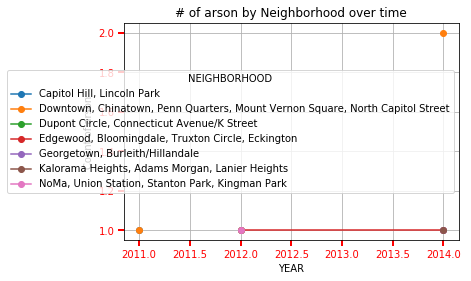

In [18]:
#Select a data frame for arson
crime_arson_df = no_null_crime_df.loc[no_null_crime_df["OFFENSE"] == "arson", :]
crime_arson_df


#Using GroupBy in order to separate the data into fields according to "offense" and "neighborhood" values
grouped_crime_arson_df = crime_arson_df.groupby(['NEIGHBORHOOD','YEAR']).size().sort_values(ascending=False)

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_crime_arson_df)

# Number of clusters/neighborhood which were exposed to arson
grouped_crime_arson_df.count()

grouped_crime_arson_df = grouped_crime_arson_df.reset_index(name='Count')
grouped_crime_arson_df["YEAR"] = pd.to_numeric(grouped_crime_arson_df["YEAR"])
dataset = grouped_crime_arson_df.pivot("YEAR", "NEIGHBORHOOD", "Count")
dataset.plot(kind="line", marker="o", grid = True, title = "Number of arson by Neighborhood over time")
grouped_crime_arson_df.set_index("YEAR")
#Set the label for the y-axis
plt.rcParams['figure.figsize']=(100,50)
plt.ylabel("Count of arson")
plt.title("# of arson by Neighborhood over time")
plt.xlabel("YEAR")
x_axis = grouped_crime_arson_df["YEAR"].unique()
plt.tick_params(direction='out', length=6, width=2, colors='r')
plt.savefig("arson.png")
# Show plot
plt.show()


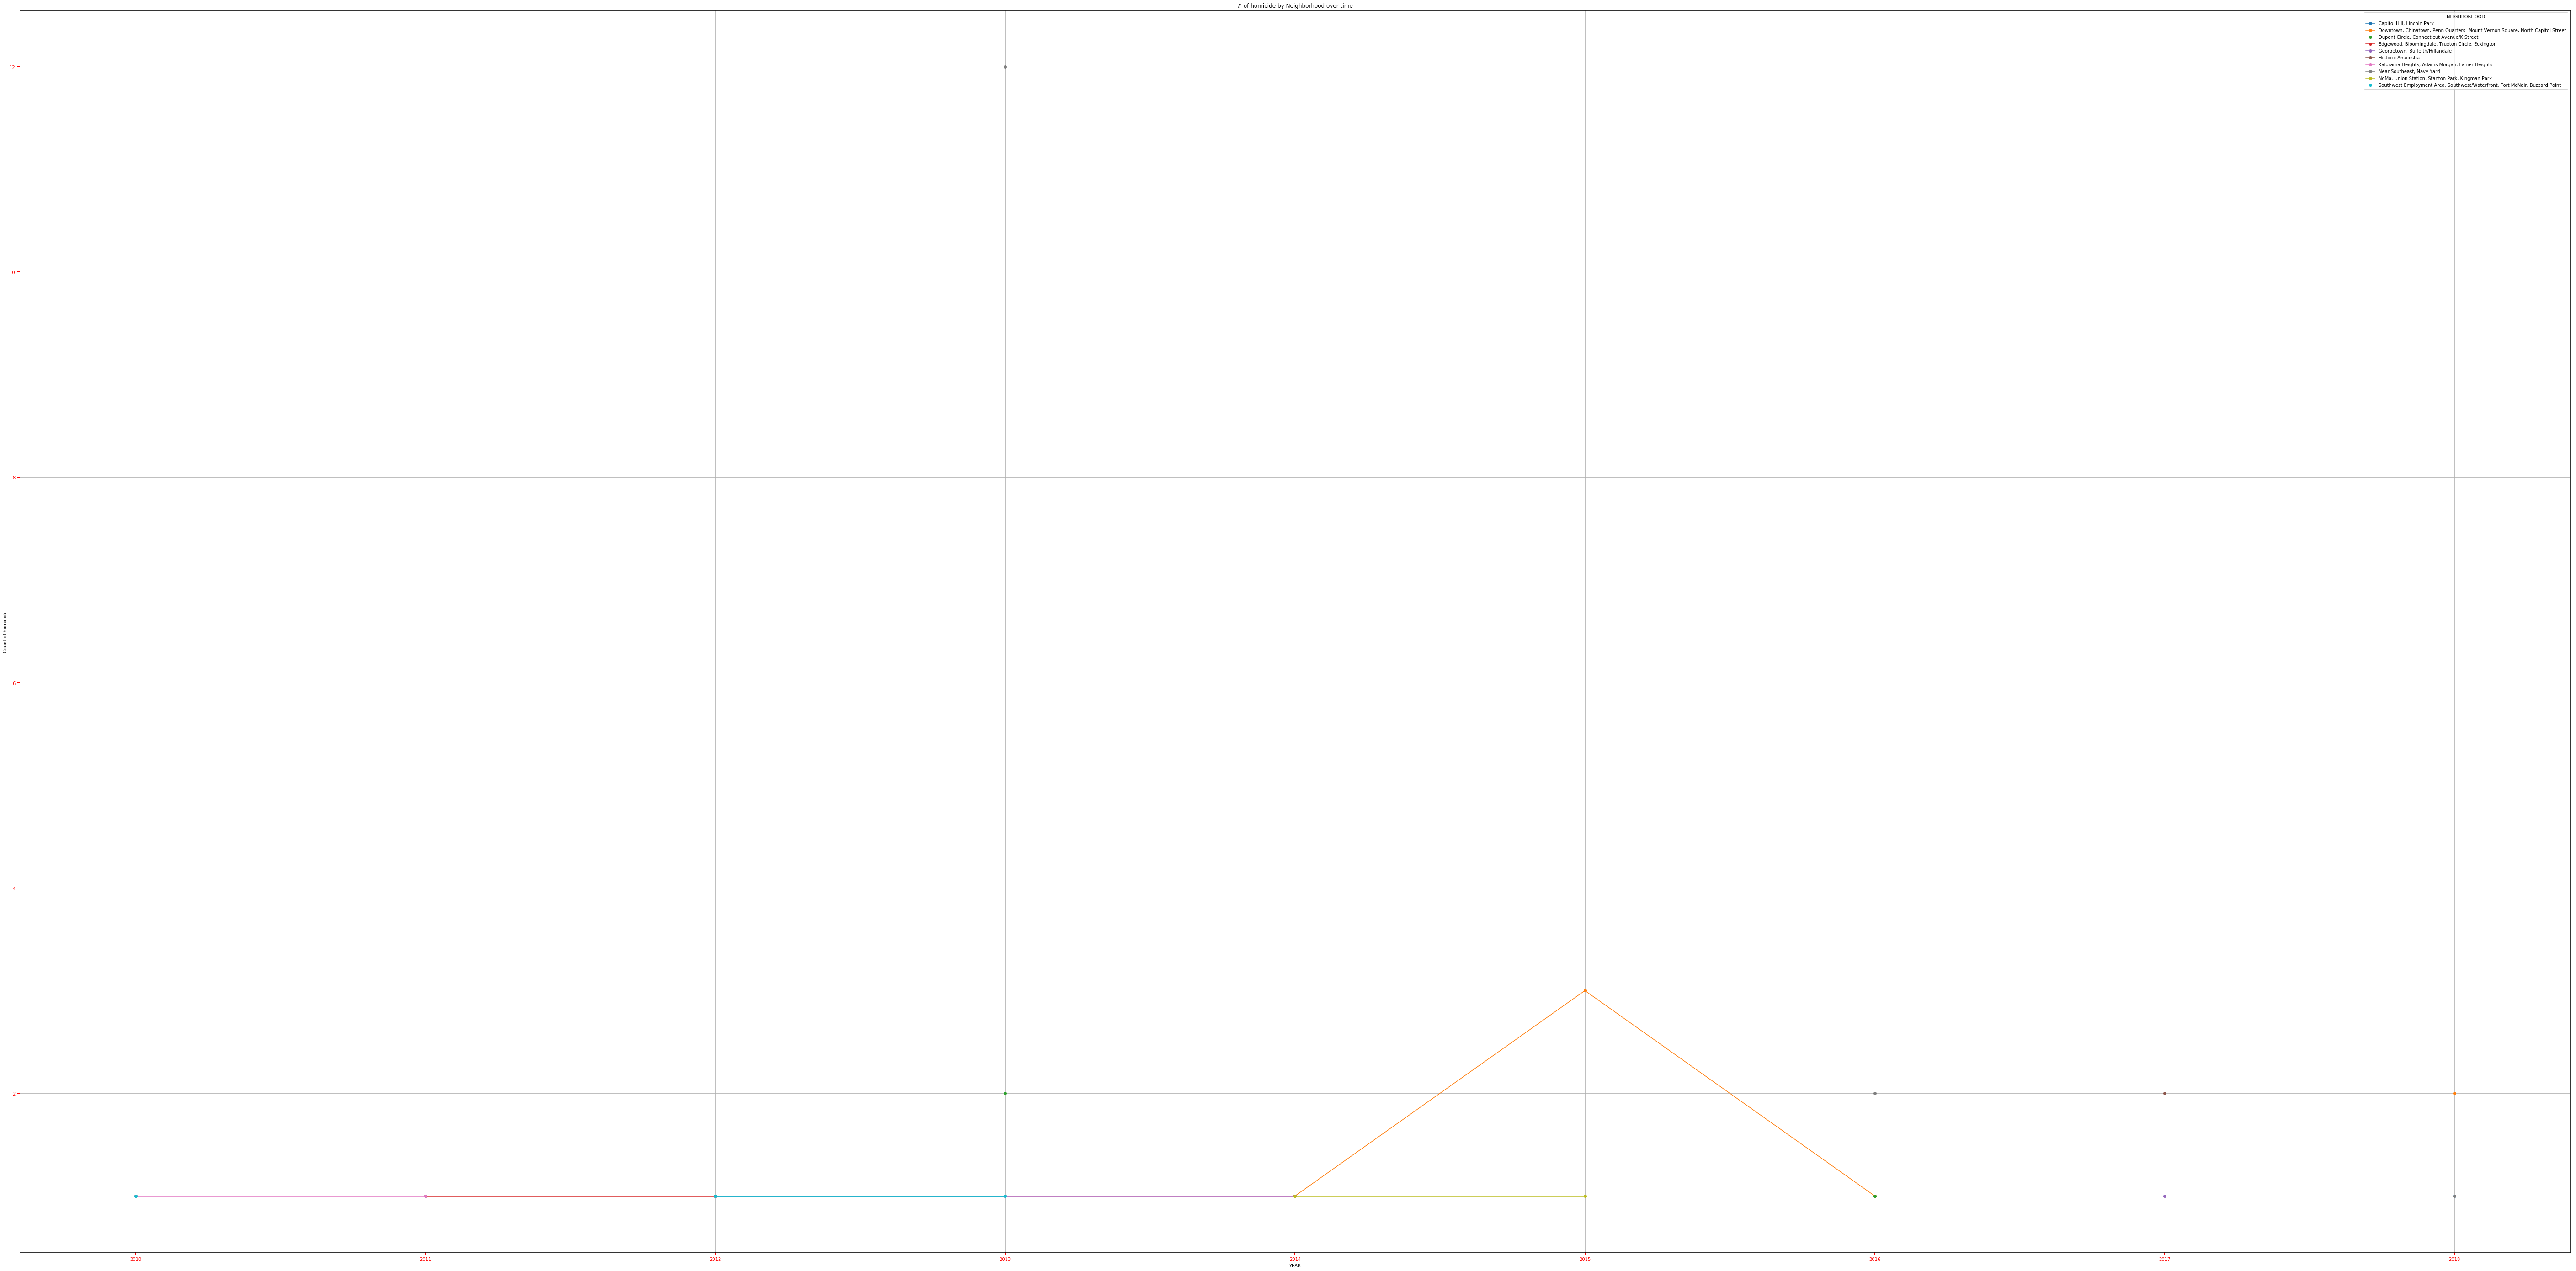

In [19]:
#Select a data frame for homicide
crime_homicide_df = no_null_crime_df.loc[no_null_crime_df["OFFENSE"] == "homicide",:]
crime_homicide_df
#Using GroupBy in order to separate the data into fields according to "offense" and "neighborhood" values
grouped_crime_homicide_df = crime_homicide_df.groupby(['NEIGHBORHOOD','YEAR']).size().sort_values(ascending=False)

grouped_crime_homicide_df = grouped_crime_homicide_df.reset_index(name='Count')
grouped_crime_homicide_df["YEAR"] = pd.to_numeric(grouped_crime_homicide_df["YEAR"])
dataset = grouped_crime_homicide_df.pivot("YEAR", "NEIGHBORHOOD", "Count")
dataset.plot(kind="line", marker="o", grid = True, title = "Number of homicide by Neighborhood over time")
grouped_crime_homicide_df.set_index("YEAR")
#Set the label for the y-axis
plt.rcParams['figure.figsize']=(100,50)
plt.ylabel("Count of homicide")
plt.title("# of homicide by Neighborhood over time")
plt.xlabel("YEAR")
x_axis = grouped_crime_homicide_df["YEAR"].unique()
plt.tick_params(direction='out', length=6, width=2, colors='r')
plt.savefig("homicide.png")
# Show plot
plt.show()

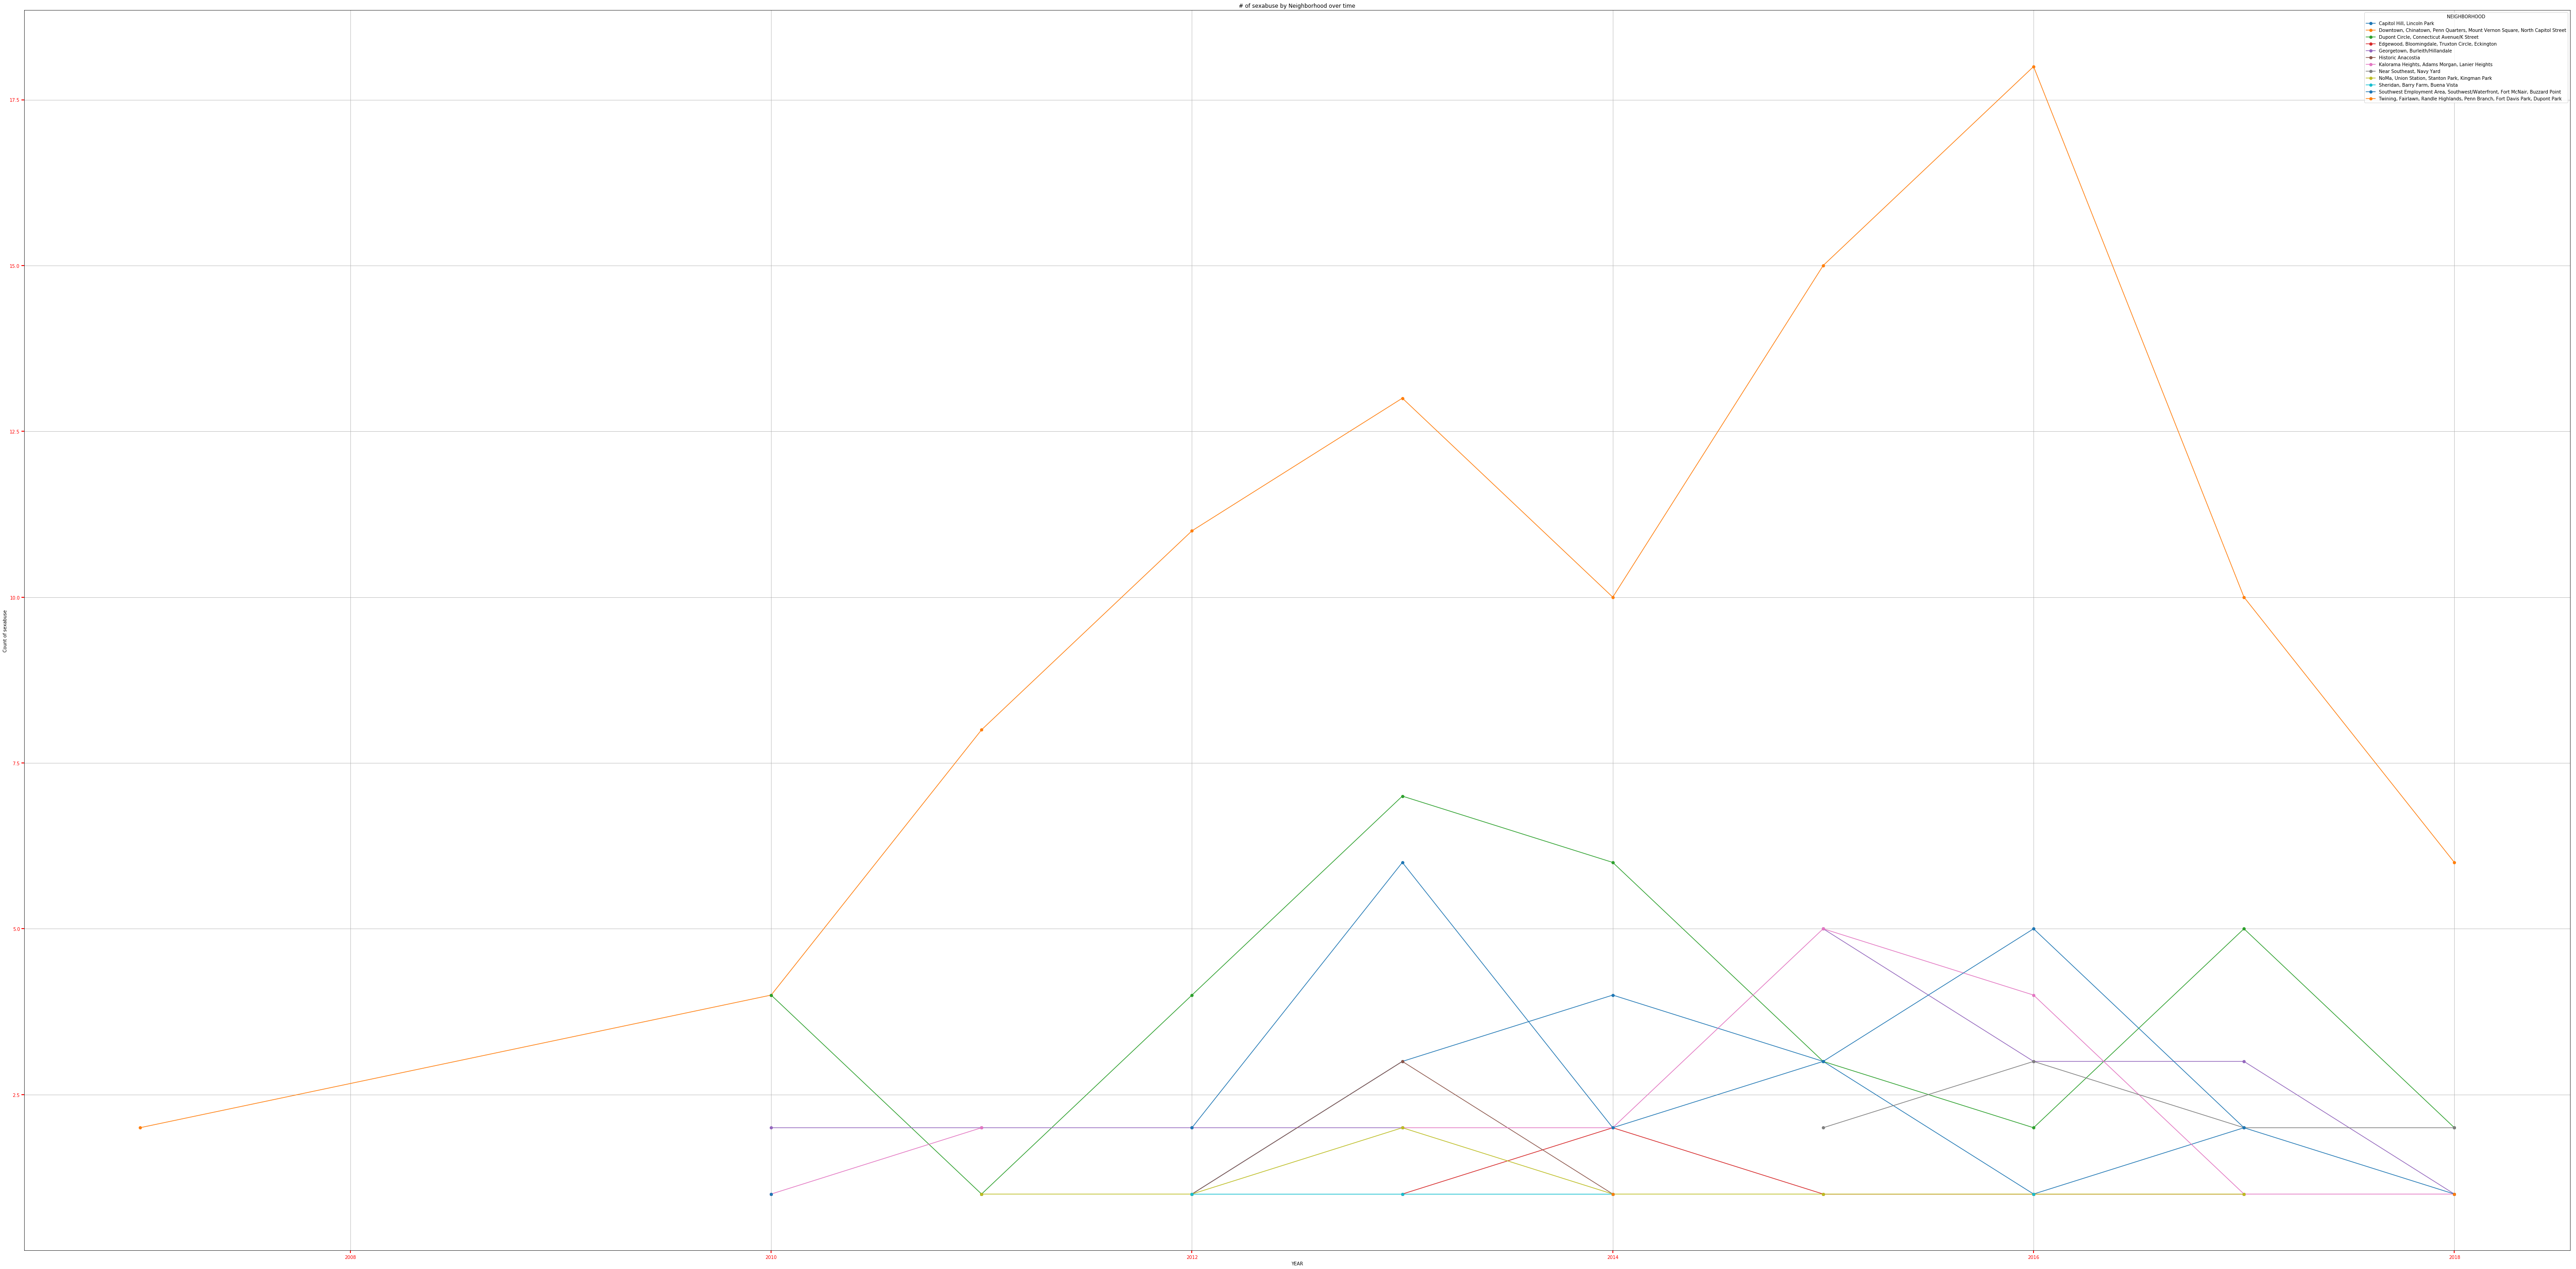

In [20]:
# Select a dataframe for sex abuse
crime_sexabuse_df = no_null_crime_df.loc[no_null_crime_df["OFFENSE"] == "sex abuse", :]
crime_sexabuse_df
#Using GroupBy in order to separate the data into fields according to "offense" and "neighborhood" values
grouped_crime_sexabuse_df = crime_sexabuse_df.groupby(['NEIGHBORHOOD','YEAR']).size().sort_values(ascending=False)

grouped_crime_sexabuse_df = grouped_crime_sexabuse_df.reset_index(name='Count')
grouped_crime_sexabuse_df["YEAR"] = pd.to_numeric(grouped_crime_sexabuse_df["YEAR"])
dataset = grouped_crime_sexabuse_df.pivot("YEAR", "NEIGHBORHOOD", "Count")
dataset.plot(kind="line", marker="o", grid = True, title = "Number of sexabuse by Neighborhood over time")
grouped_crime_sexabuse_df.set_index("YEAR")
#Set the label for the y-axis
plt.rcParams['figure.figsize']=(100,50)
plt.ylabel("Count of sexabuse")
plt.title("# of sexabuse by Neighborhood over time")
plt.xlabel("YEAR")
x_axis = grouped_crime_sexabuse_df["YEAR"].unique()
plt.tick_params(direction='out', length=6, width=2, colors='r')
plt.savefig("sexabuse.png")
# Show plot
plt.show()



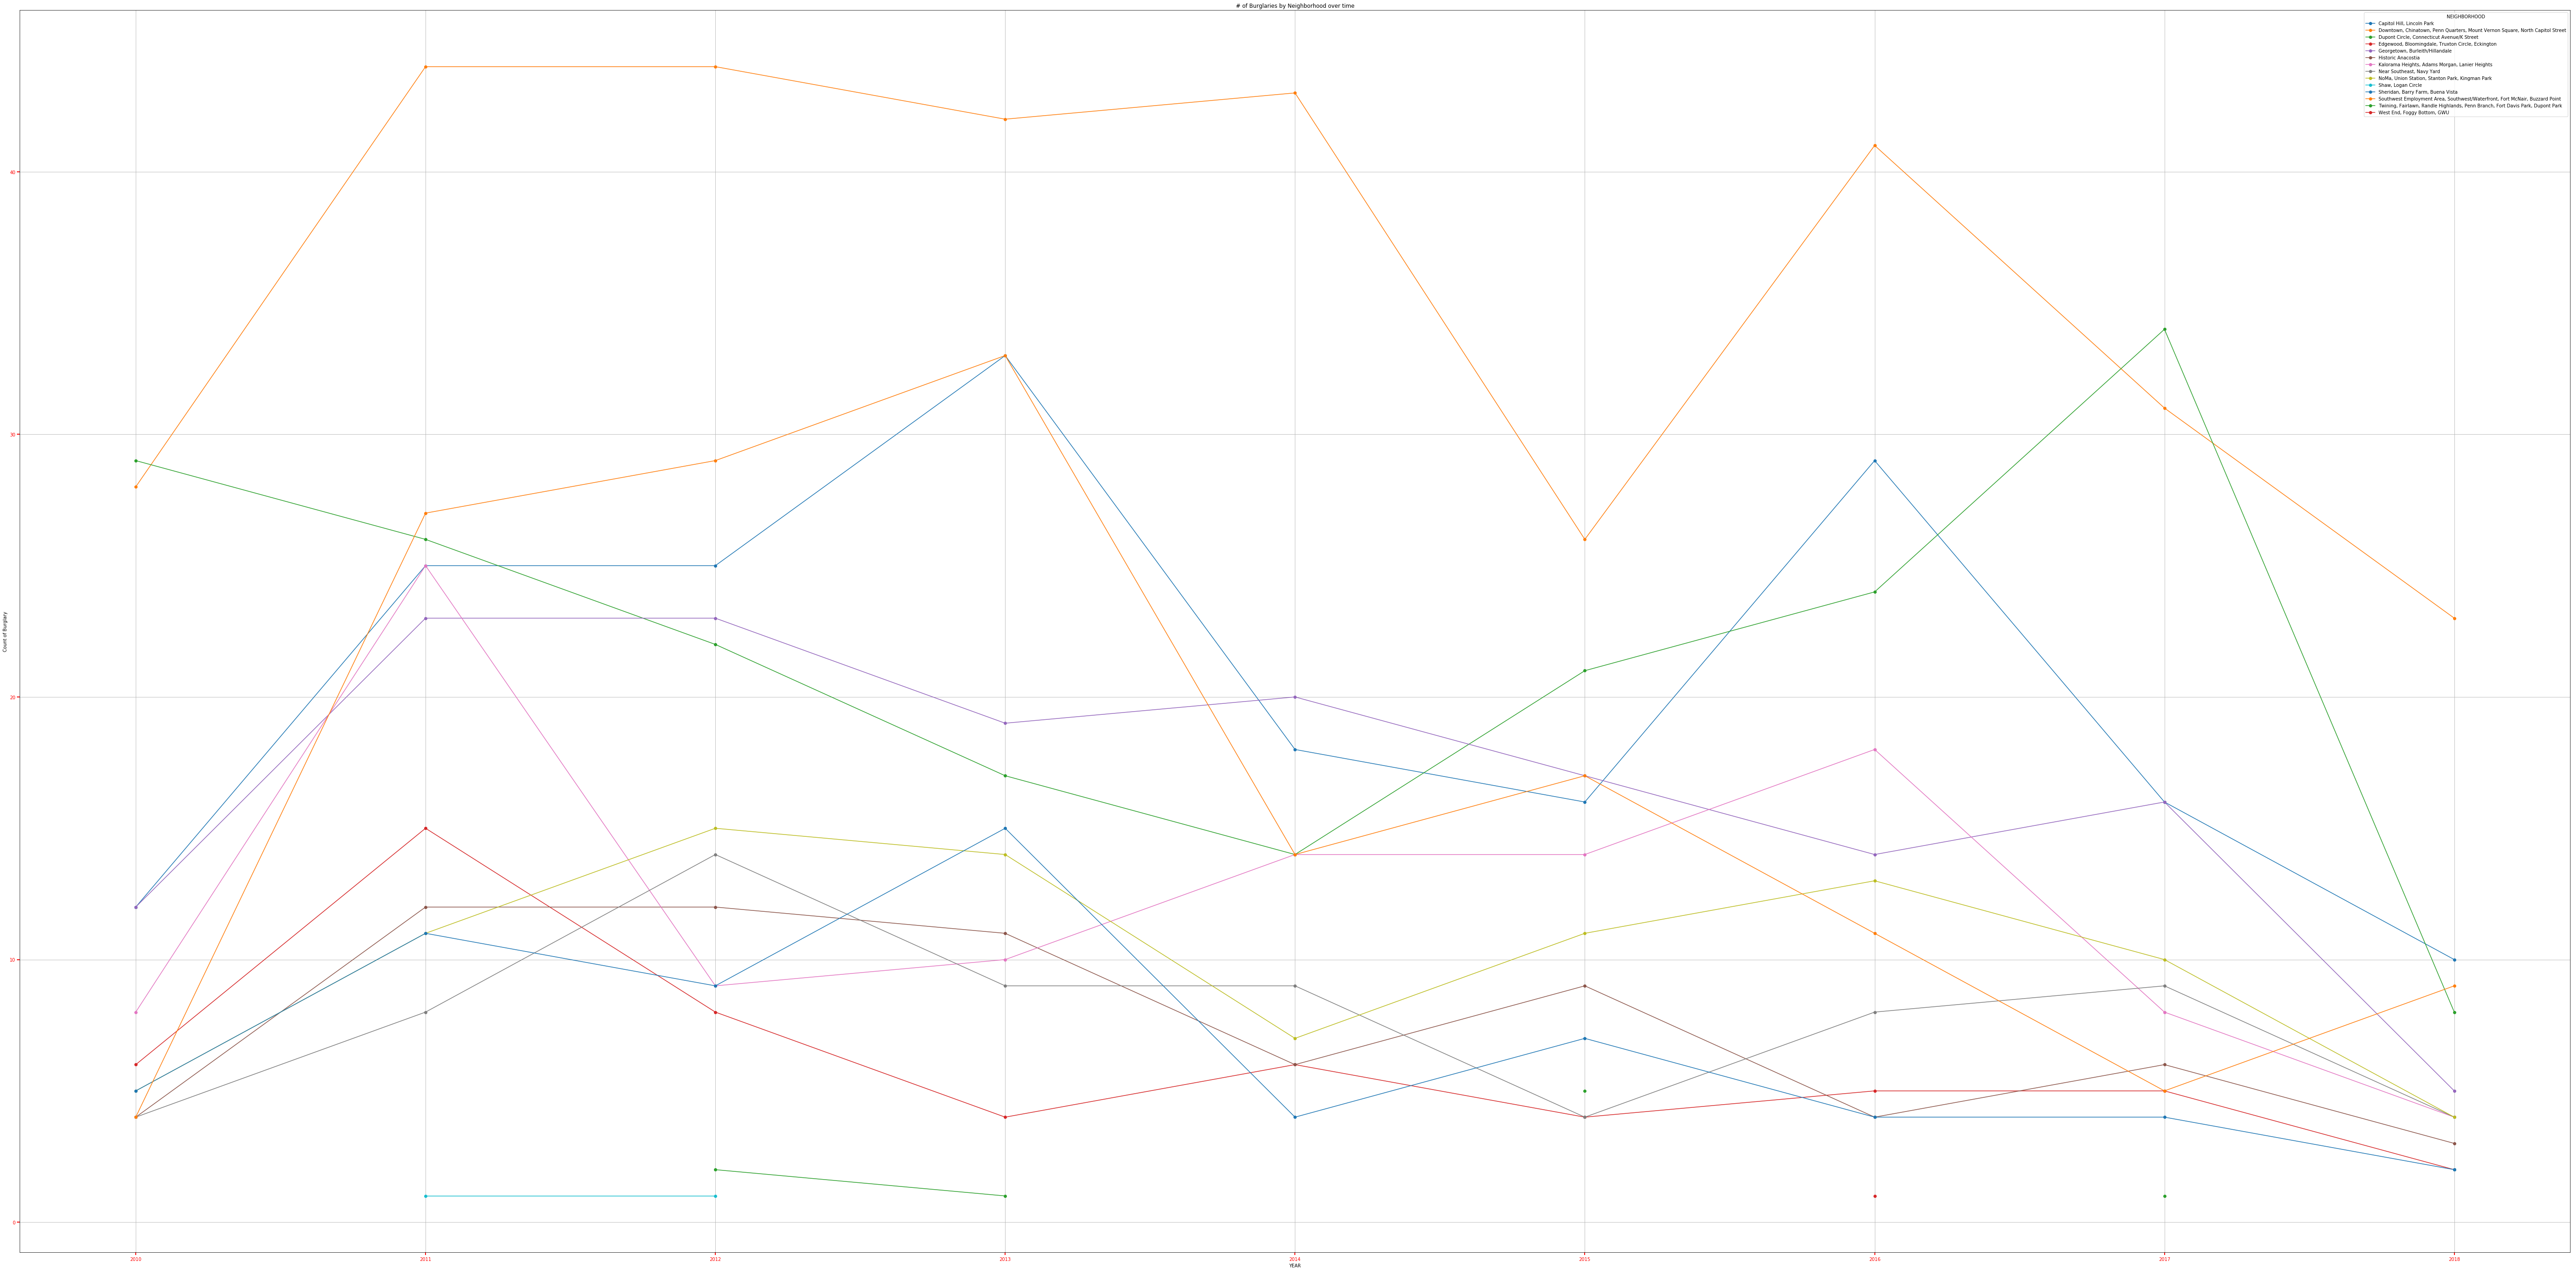

<Figure size 7200x3600 with 0 Axes>

In [21]:
# Select a dataframe for burglary
crime_burglary_df = no_null_crime_df.loc[no_null_crime_df["OFFENSE"] == "burglary", :]
crime_burglary_df
#Using GroupBy in order to separate the data into fields according to "offense" and "neighborhood" values
grouped_crime_burglary_df = crime_burglary_df.groupby(['NEIGHBORHOOD','YEAR']).size().sort_values(ascending=False)
grouped_crime_burglary_df = grouped_crime_burglary_df.reset_index(name='Count')
grouped_crime_burglary_df.head(20)
grouped_crime_burglary_df["YEAR"] = pd.to_numeric(grouped_crime_burglary_df["YEAR"])
dataset = grouped_crime_burglary_df.pivot("YEAR", "NEIGHBORHOOD", "Count")

# Display a graph for burglary by neighborhood over time
dataset.plot(kind="line", marker="o", grid = True , title = "Number of Burglaries by Neighborhood over time")
grouped_crime_burglary_df.set_index("YEAR")
#Set the label for the y-axis
#plt.rcParams['figure.figsize']=(100,50)
plt.ylabel("Count of Burglary")
plt.title("# of Burglaries by Neighborhood over time")
plt.xlabel("YEAR")
x_axis = grouped_crime_burglary_df["YEAR"].unique()
plt.tick_params(direction='out', length=6, width=2, colors='r')
# Show plot
plt.show()
plt.savefig("burglary.png")


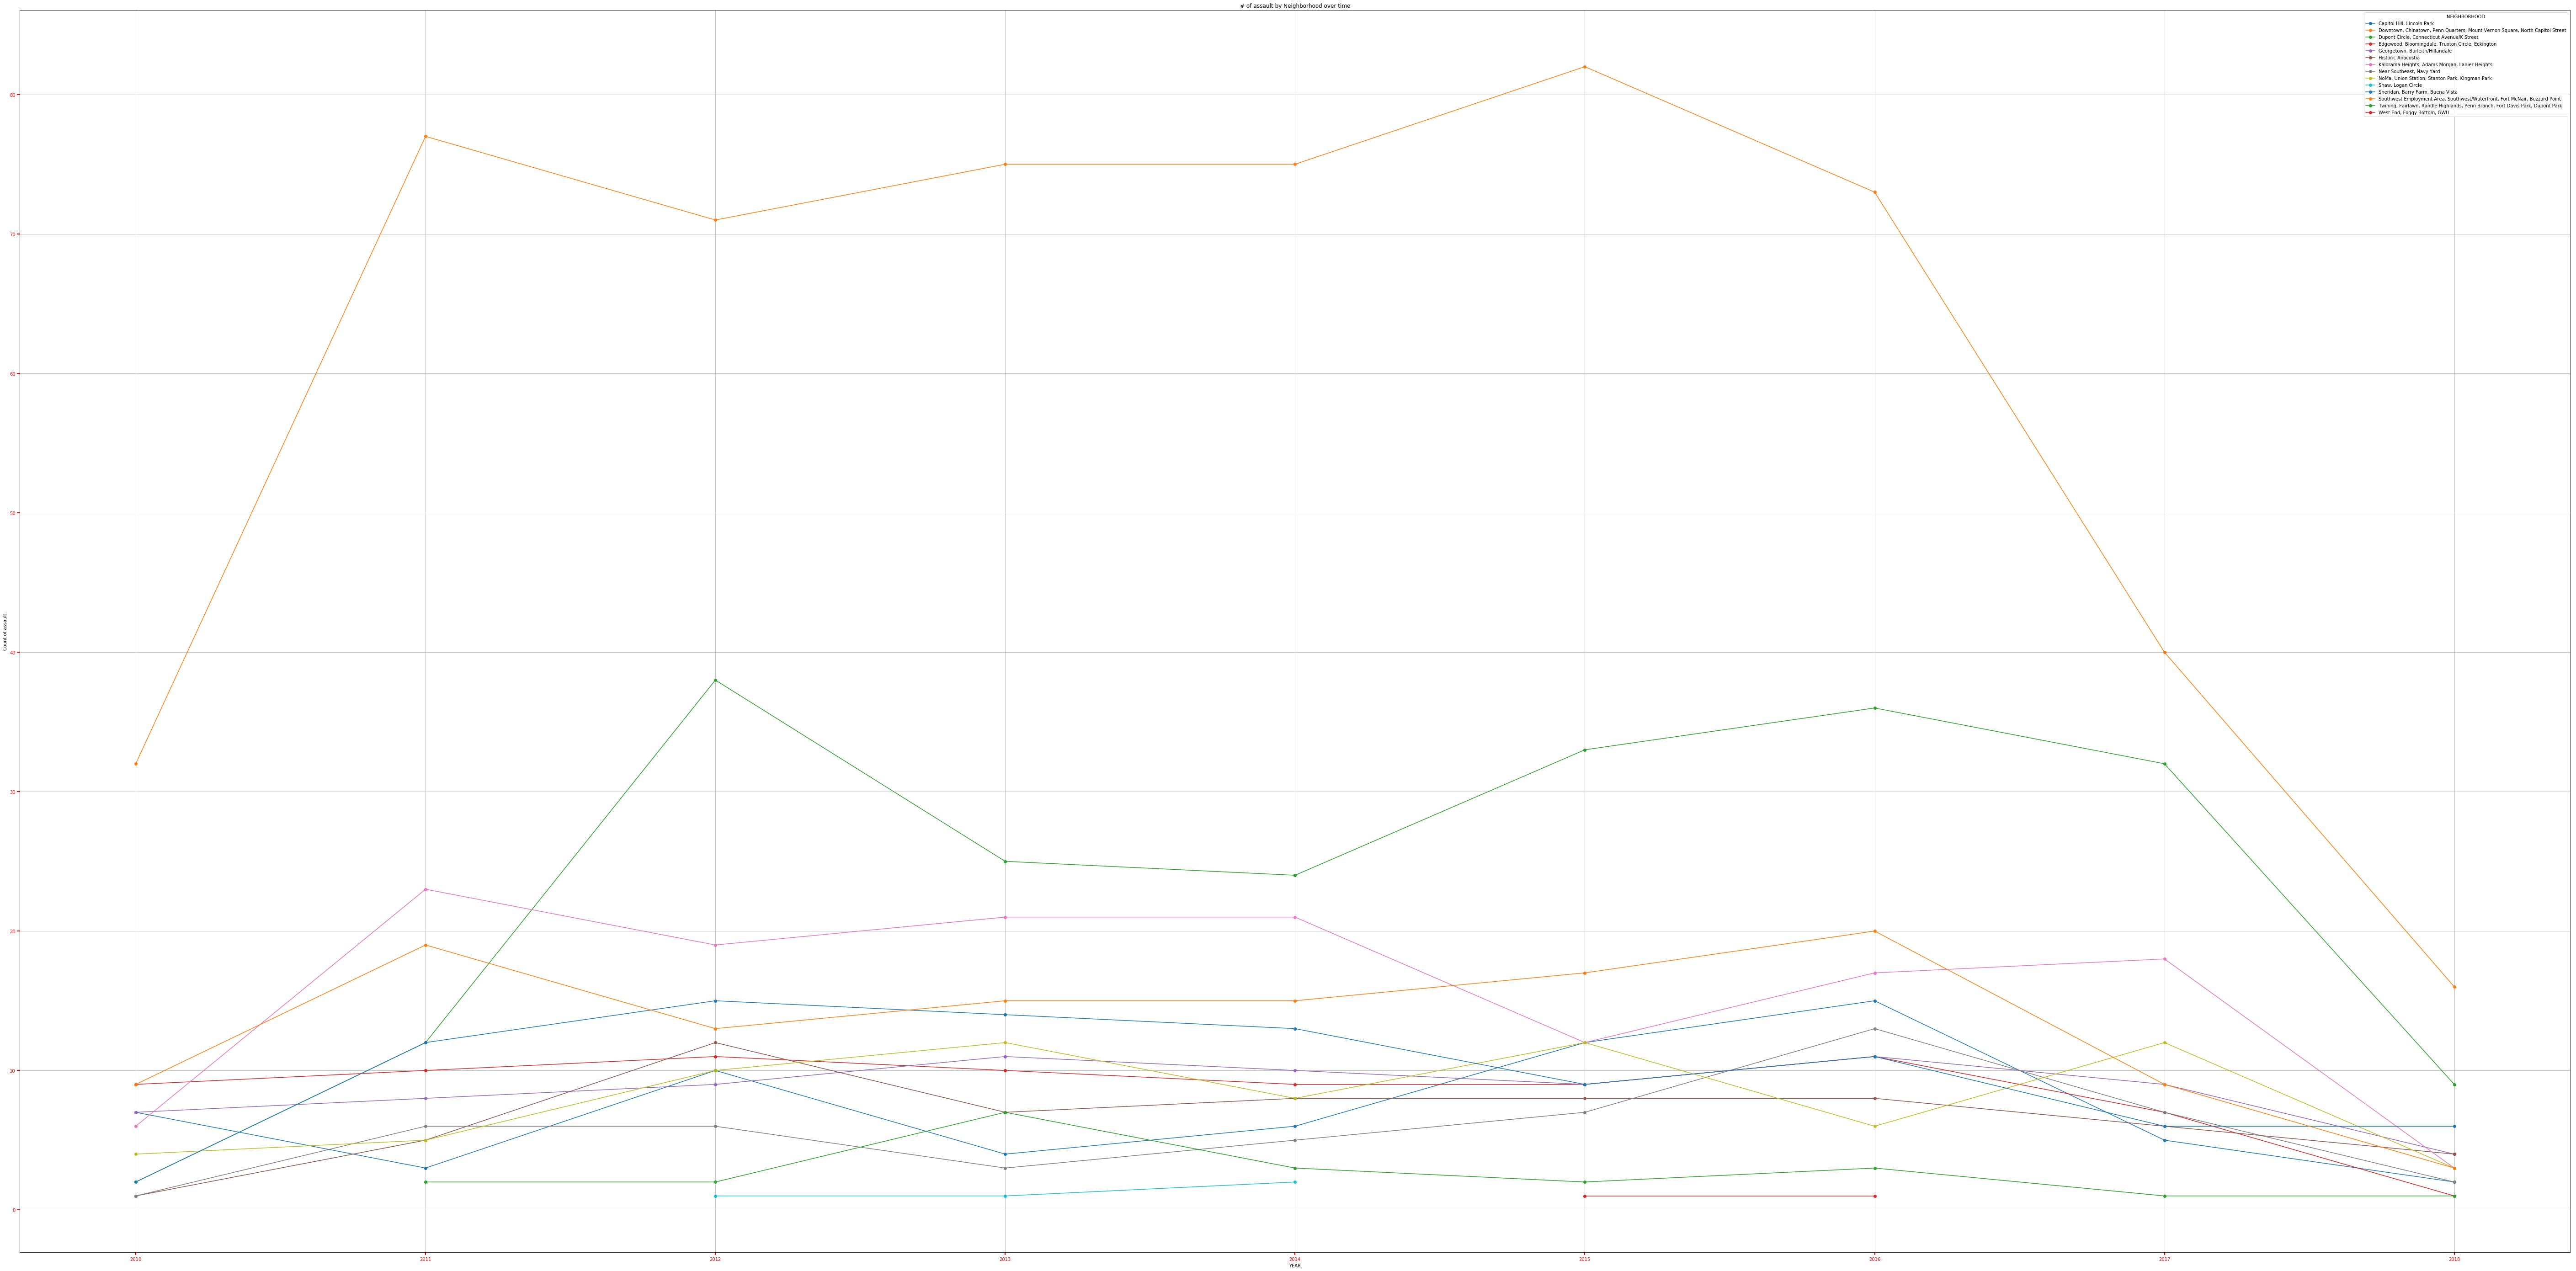

<Figure size 720x360 with 0 Axes>

In [27]:
# Select a dataframe for assault
crime_assault_df = no_null_crime_df.loc[no_null_crime_df["OFFENSE"] == "assault w/dangerous weapon", :]
crime_assault_df
#Using GroupBy in order to separate the data into fields according to "offense" and "neighborhood" values
grouped_crime_assault_df = crime_assault_df.groupby(['NEIGHBORHOOD','YEAR']).size().sort_values(ascending=False)
grouped_crime_assault_df = grouped_crime_assault_df.reset_index(name='Count')
grouped_crime_assault_df.head(20)
grouped_crime_assault_df["YEAR"] = pd.to_numeric(grouped_crime_assault_df["YEAR"])
dataset = grouped_crime_assault_df.pivot("YEAR", "NEIGHBORHOOD", "Count")

# Display a graph for assault by neighborhood over time
dataset.plot(kind="line", marker="o", grid = True , title = "Number of assault by Neighborhood over time")
grouped_crime_assault_df.set_index("YEAR")
#Set the label for the y-axis
plt.rcParams['figure.figsize']=(10,5)
plt.ylabel("Count of assault")
plt.title("# of assault by Neighborhood over time")
plt.xlabel("YEAR")
x_axis = grouped_crime_assault_df["YEAR"].unique()
plt.tick_params(direction='out', length=6, width=2, colors='r')
# Show plot
plt.show()
plt.savefig("assault.png")



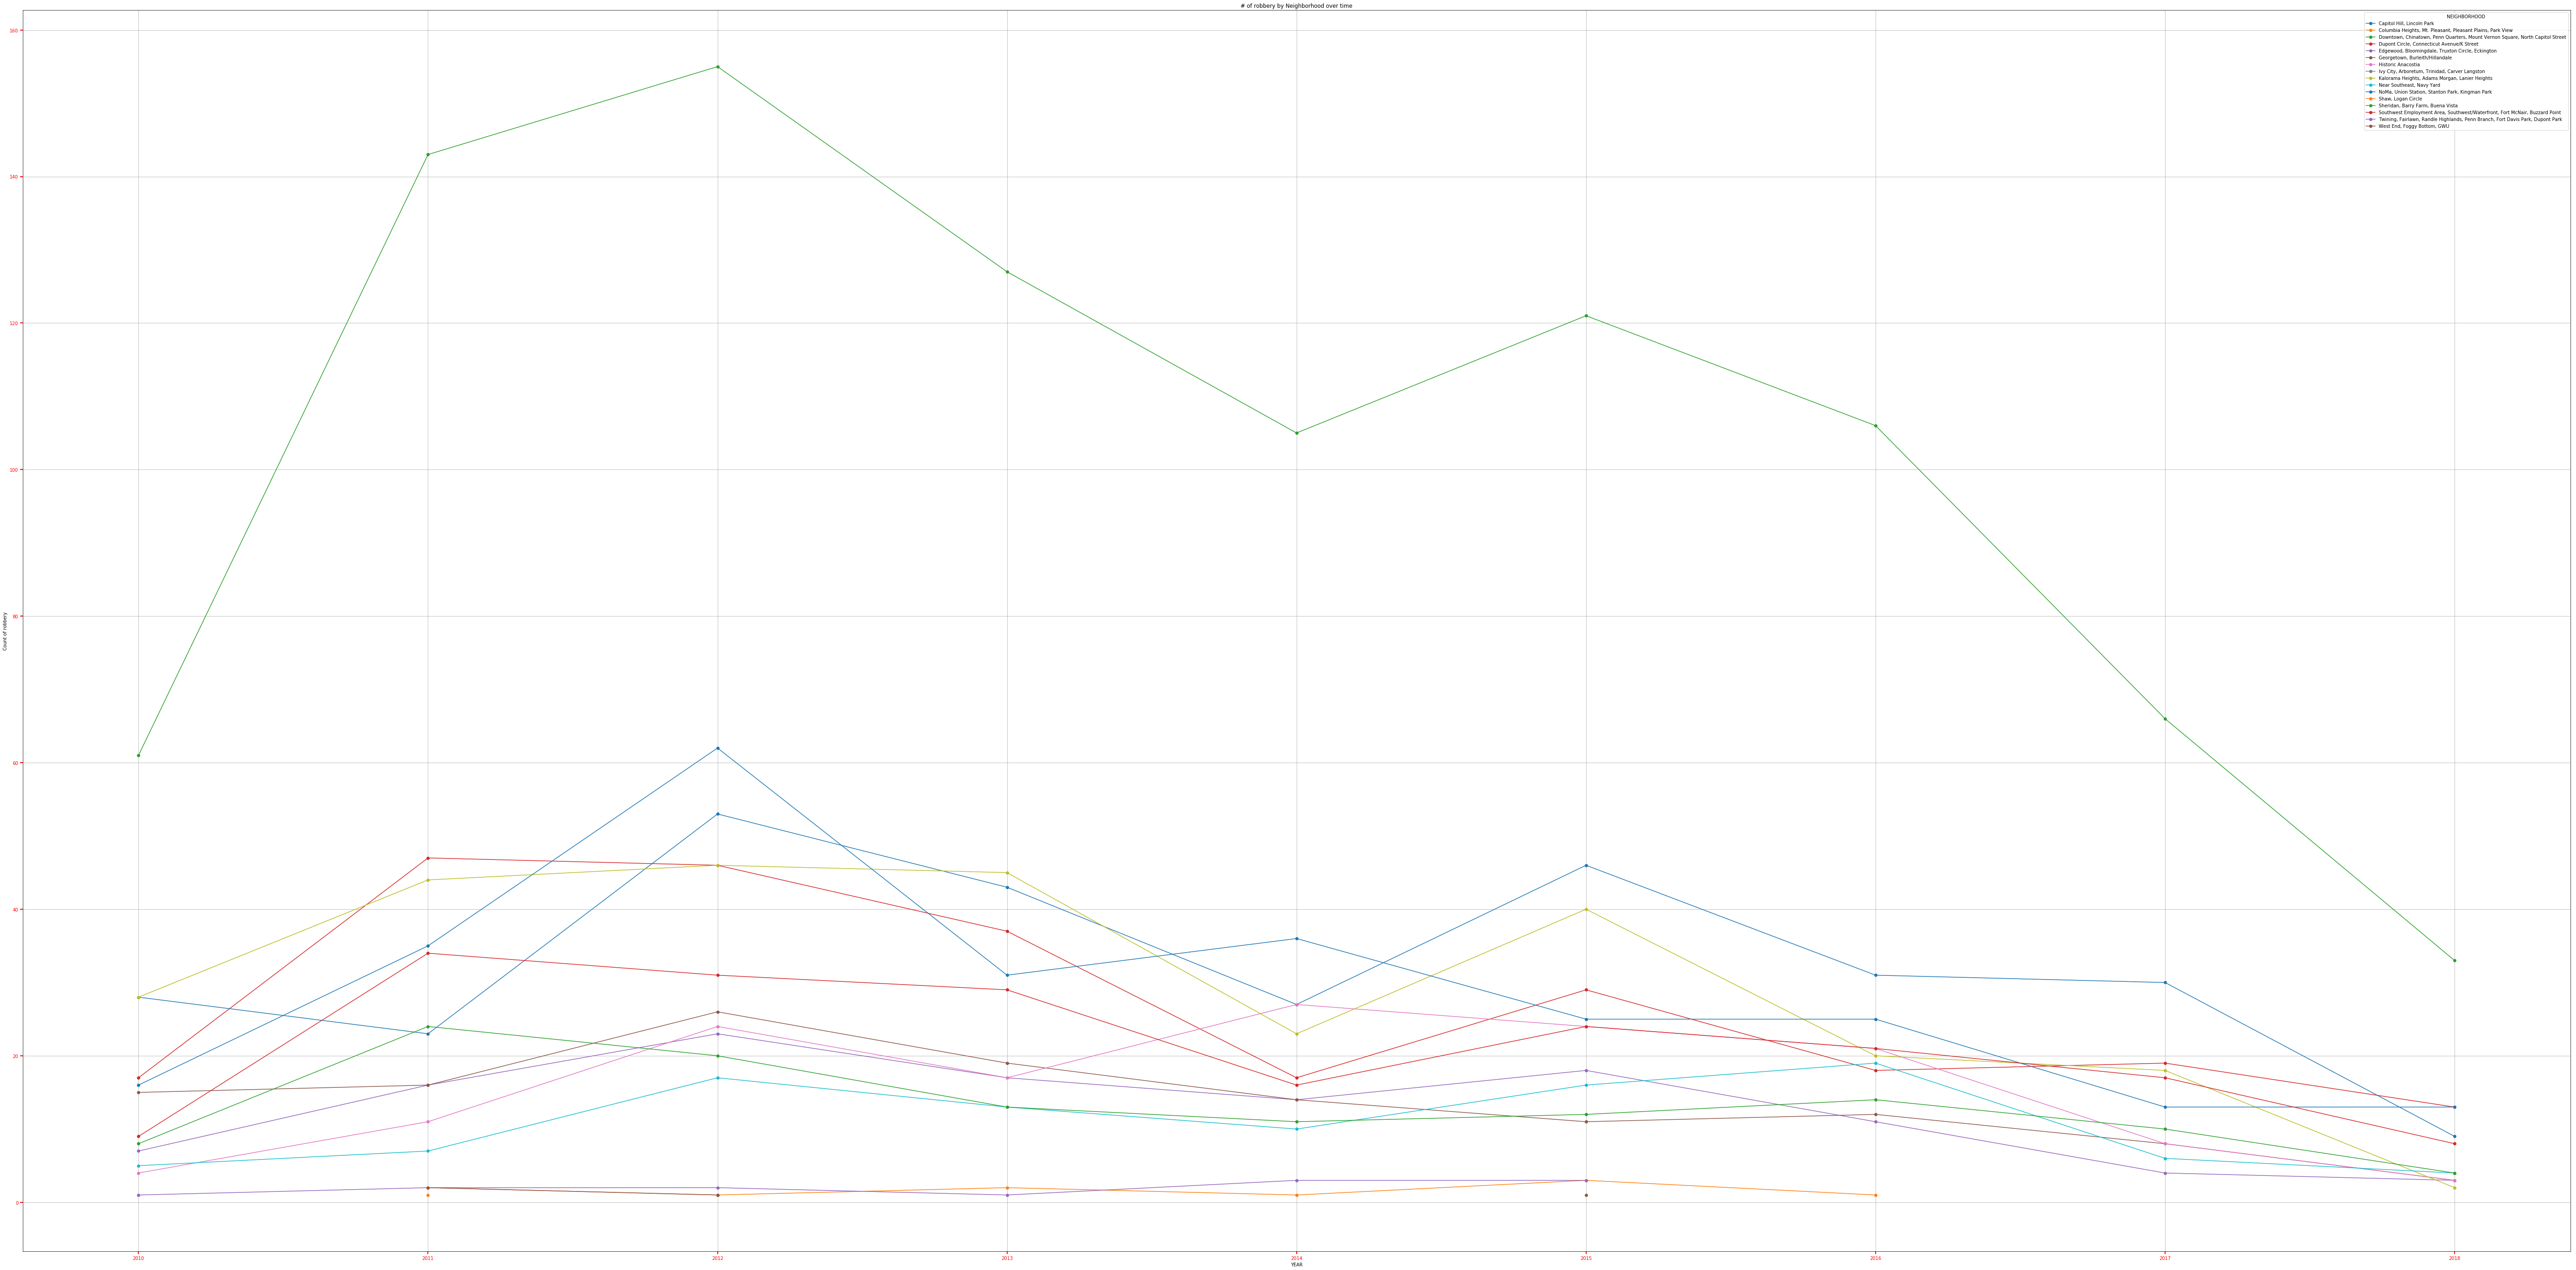

<Figure size 7200x3600 with 0 Axes>

In [23]:
# Select a dataframe for robbery
crime_robbery_df = no_null_crime_df.loc[no_null_crime_df["OFFENSE"] == "robbery", :]
crime_robbery_df
#Using GroupBy in order to separate the data into fields according to "offense" and "neighborhood" values
grouped_crime_robbery_df = crime_robbery_df.groupby(['NEIGHBORHOOD','YEAR']).size().sort_values(ascending=False)
grouped_crime_robbery_df = grouped_crime_robbery_df.reset_index(name='Count')
grouped_crime_robbery_df.head(20)
grouped_crime_robbery_df["YEAR"] = pd.to_numeric(grouped_crime_robbery_df["YEAR"])
dataset = grouped_crime_robbery_df.pivot("YEAR", "NEIGHBORHOOD", "Count")

# Display a graph for robbery by neighborhood over time
dataset.plot(kind="line", marker="o", grid = True , title = "Number of robbery by Neighborhood over time")
grouped_crime_robbery_df.set_index("YEAR")
#Set the label for the y-axis
#plt.rcParams['figure.figsize']=(100,50)
plt.ylabel("Count of robbery")
plt.title("# of robbery by Neighborhood over time")
plt.xlabel("YEAR")
x_axis = grouped_crime_robbery_df["YEAR"].unique()
plt.tick_params(direction='out', length=6, width=2, colors='r')
# Show plot
plt.show()
plt.savefig("robbery.png")


In [24]:
#Display a heatmap of robberies
locations = crime_robbery_df[["LATITUDE","LONGITUDE"]]
fig=gmaps.figure(map_type='HYBRID')
fig.add_layer(gmaps.heatmap_layer(locations))
fig


Figure(layout=FigureLayout(height='420px'))

In [25]:
#Display a heatmap of homicide
locations = crime_homicide_df[["LATITUDE","LONGITUDE"]]
fig=gmaps.figure(map_type='HYBRID')
fig.add_layer(gmaps.heatmap_layer(locations))
fig

Figure(layout=FigureLayout(height='420px'))

In [26]:
#Display a heatmap of other theft
locations = crime_theftother_df[["LATITUDE","LONGITUDE"]]
fig=gmaps.figure(map_type='HYBRID')
fig.add_layer(gmaps.heatmap_layer(locations))
fig

NameError: name 'crime_theftother_df' is not defined

In [ ]:
#Display a heat map of assault
locations = crime_assault_df[["LATITUDE","LONGITUDE"]]
fig=gmaps.figure(map_type='HYBRID')
fig.add_layer(gmaps.heatmap_layer(locations))
fig

In [ ]:
#Display a heatmap of burglary
locations = crime_burglary_df[["LATITUDE","LONGITUDE"]]
fig=gmaps.figure(map_type='HYBRID')
fig.add_layer(gmaps.heatmap_layer(locations))
fig

In [ ]:
#Display a heatmap of theft from auto
locations = crime_theftauto_df[["LATITUDE","LONGITUDE"]]
fig=gmaps.figure(map_type='HYBRID')
fig.add_layer(gmaps.heatmap_layer(locations))
fig

In [ ]:
#Display a heatmap of motor vehicle theft
locations = crime_vehicletheft_df[["LATITUDE","LONGITUDE"]]
fig=gmaps.figure(map_type='HYBRID')
fig.add_layer(gmaps.heatmap_layer(locations))
fig

In [ ]:
#Display a heatmap of arson
locations = crime_arson_df[["LATITUDE","LONGITUDE"]]
fig=gmaps.figure(map_type='HYBRID')
fig.add_layer(gmaps.heatmap_layer(locations))
fig

In [ ]:
#Display a heatmap of sex abuse
locations = crime_sexabuse_df[["LATITUDE","LONGITUDE"]]
fig=gmaps.figure(map_type='HYBRID')
fig.add_layer(gmaps.heatmap_layer(locations))
fig